In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

#reading in data
allAvgWalkingTime = pd.read_csv('../avgTravelTime/averageWalkingTimeNeighborhoods.csv')
allAvgCyclingTime = pd.read_csv('../avgTravelTime/averageCyclingTimeNeighborhoods.csv')
allAvgDrivingTime = pd.read_csv('../avgTravelTime/averageDrivingTimeNeighborhoods.csv')
whiteAvgWalkingTime = pd.read_csv('../avgTravelTime/WhiteAloneaverageWalkingTimeNeighborhoods.csv')
blackAvgWalkingTime = pd.read_csv('../avgTravelTime/BlackorAfricanAmericanAloneaverageWalkingTimeNeighborhoods.csv')


walkingNeighborhoods = pd.read_csv('../avgTravelTime/completedWalkingNeighborhoodRadiiDF.csv')
cyclingNeighborhoods = pd.read_csv('../avgTravelTime/completedCyclingNeighborhoodRadiiDF.csv')
drivingNeighborhoods = pd.read_csv('../avgTravelTime/completedDrivingNeighborhoodRadiiDF.csv')

populationDemographics = pd.read_csv('../../data/clean/population_demographics.csv')

In [2]:
censusTracts = populationDemographics[['geoid','geometry','qualifying name', 'current land area (sq. m)', 'current water area (sq. m)', ]]

censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

In [3]:
combinedCensusTracts = gpd.GeoDataFrame({'BRANCH': ['All Tracts'],'geometry': [censusTracts.loc[0,'geometry']]})
for i in range(censusTracts.shape[0] - 1):    
        oneTract = gpd.GeoDataFrame({'Tract': [censusTracts.loc[i,'geoid']],'geometry': [censusTracts.loc[i+1,'geometry']]})
        combinedCensusTracts = combinedCensusTracts.union(oneTract, align = True)

In [4]:
combinedCensusTracts = combinedCensusTracts.set_crs(4326)

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Average Walking Time to Local Library')

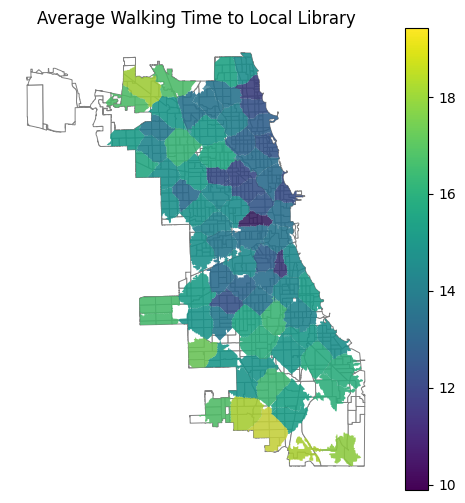

In [19]:
allAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
allAvgWalkingTime = gpd.GeoDataFrame(
    allAvgWalkingTime.loc[:, [c for c in allAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgWalkingTime = gpd.clip(allAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth=.7)
allAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
allAvgWalkingTime.plot(ax=base, color='teal', alpha = .2)
ax.axis('off')
ax.set_title('Average Walking Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Cycling Time to Local Library')

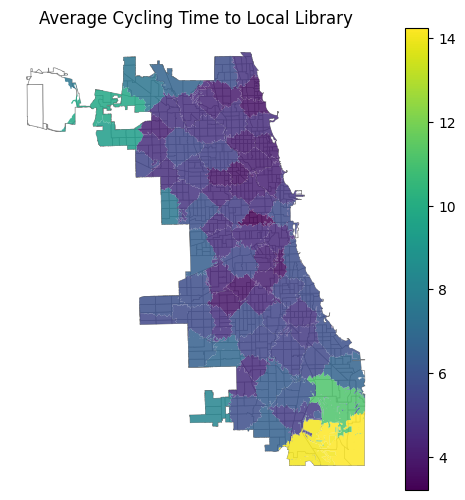

In [97]:
allAvgCyclingTime['geometry'] = cyclingNeighborhoods['geometry']
allAvgCyclingTime = gpd.GeoDataFrame(
    allAvgCyclingTime.loc[:, [c for c in allAvgCyclingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgCyclingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgCyclingTime = gpd.clip(allAvgCyclingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgCyclingTime.plot(column='Average Cycling Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Cycling Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Driving Time to Local Library')

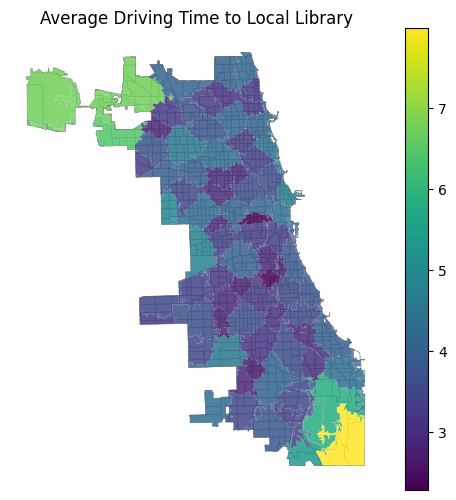

In [107]:
allAvgDrivingTime['geometry'] = drivingNeighborhoods['geometry']
allAvgDrivingTime = gpd.GeoDataFrame(
    allAvgDrivingTime.loc[:, [c for c in allAvgDrivingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(allAvgDrivingTime["geometry"]),
    crs="epsg:4326",
    )

allAvgDrivingTime = gpd.clip(allAvgDrivingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
allAvgDrivingTime.plot(column='Average Driving Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Driving Time to Local Library', fontdict={'fontsize': '12', 'fontweight' : '3'})

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Average Walking Time (Minutes) for White Communities')

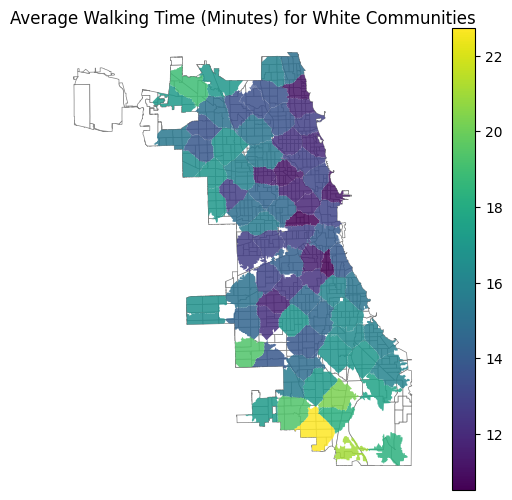

In [103]:
whiteAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
whiteAvgWalkingTime = gpd.GeoDataFrame(
    whiteAvgWalkingTime.loc[:, [c for c in whiteAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(whiteAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

whiteAvgWalkingTime = gpd.clip(whiteAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
whiteAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for White Communities', fontdict={'fontsize': '12', 'fontweight' : '3'})

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


Text(0.5, 1.0, 'Average Walking Time (Minutes) for Black and African American Communities')

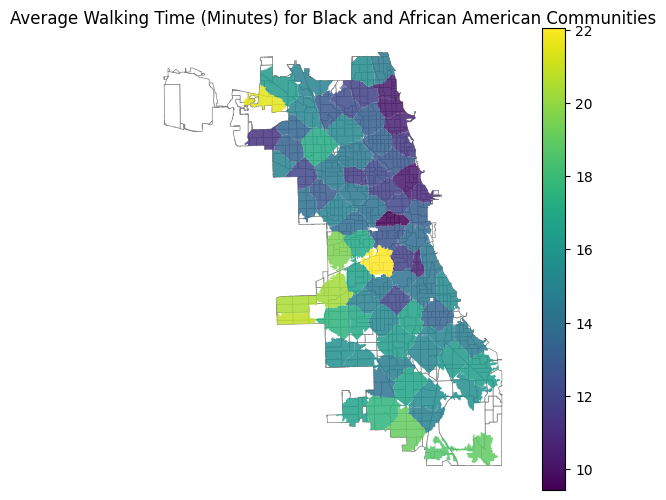

In [106]:
blackAvgWalkingTime['geometry'] = walkingNeighborhoods['geometry']
blackAvgWalkingTime = gpd.GeoDataFrame(
    blackAvgWalkingTime.loc[:, [c for c in blackAvgWalkingTime.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(blackAvgWalkingTime["geometry"]),
    crs="epsg:4326",
    )

blackAvgWalkingTime = gpd.clip(blackAvgWalkingTime,combinedCensusTracts)

fig, ax = plt.subplots(1, figsize=(6, 6))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth = .5)
blackAvgWalkingTime.plot(column='Average Walking Time (Minutes)', legend=True, ax=base, alpha = .85)
ax.axis('off')
ax.set_title('Average Walking Time (Minutes) for Black and African American Communities', fontdict={'fontsize': '12', 'fontweight' : '3'})

In [ ]:
# plot walking education